# Classificazione e regressione logistica

Nella lezione precedente abbiamo affrontato il problema della regressione lineare, discutendo come a partire dal principio di massima verosimiglianza è possibile definire un algoritmo che definisca una predizione per un set di variabili $\vec y$ dato un set di variabili note $\vec x$.

Nella discussione abbiamo dovuto ipotizzare la forma funzionale della densità di probabilità associata alle variabili $\vec y$, e abbiamo assunto una forma gaussiana così come indicato dal teorema del limite centrale. Abbiamo anche accennato che con assunzioni diverse è possibile comunque definire un algoritmo di regressione, a patto di affrontare il problema dell'ottimizzazione con un algoritmo numerico. Tra gli esercizi, abbiamo utilizzato ad esempio Minuit per minimizzare numericamente la funzione $\chi^2$.

In questo *notebook*, affronteremo il problema della classificazione, ovvero estendermo la trattazione della regressione lineare al caso in cui le variabili $\vec y$ non siano continue, ma *categoriche* o *booleane*, cioè possano assumere valore *Vero* oppure *Falso*, ossia 1 oppure 0.

Partiremo dalla trattazione del caso della **classificazione binaria** in cui $\vec y$ ha una sola componente, $y$, per poi estendere al caso importante in cui siano presenti più componenti del vettore delle variabili incognite.

Prima di addentrarci nel formalismo matematico, chiediamoci cosa significa chiedere ad un algoritmo di definire una predizione sulla categoria a cui appartiene un certo vettore $\vec x$.
Nel caso della regressione, abbiamo visto che lo stimatore che costruiamo nel nostro algoritmo è la **media della distribuzione gaussiana** che definisce la distribuzione di probabilità $p(y|\vec x)$, ignorandone, ad esempio, la deviazione standard.

Nel caso della classificazione binaria, la distribuzione di probabilità $p(y|\vec x)$ sarà la [Distribuzione di Bernoulli](https://it.wikipedia.org/wiki/Distribuzione_di_Bernoulli) che è definita da un singolo parametro $\mathrm {p}$ che rappresenta la probabilità che $y$ sia vero. Il nostro algoritmo di classificazione sarà allora uno stimatore, basato sul principio della massima verosimiglianza, del parametro $\mathrm {p}$ della Distribuzione di Bernoulli, ossia uno stimatore della probabilità che $y$ sia vero, in funzione dei valori assunti da $\vec x$.





## Entropia incrociata binaria (*Binary cross-entropy*)
Come discusso per il caso della regressione lineare, partiamo dalla distribuzione di probabilità dei valori, *vero/falso* che possono essere assunti da y:
$$
p(y | f(\vec x| \mathrm p))
$$
e costruiamo la funzione verosimiglianza (likelihood) come
$$
\mathcal L = \prod_i p(y_i | f(\vec x_i| \vec \theta))
$$
dove $i$ è ancora l'indice che corre sugli esempi che costituiscono il dataset di addestramento (o *training*) in cui abbiamo esempi di $\vec x$ associati ad una categoria nota, in cui $y$ è vero o falso.

Per procedere devo assumere che $p(y|f(\vec x| \vec \theta))$ sia proprio la distribuzione di Bernoulli, dove la proabilità $\mathrm p$ di assumere il valore vero, sarà una generica funzione di $\vec x$ definita dai parametri $\vec \theta$, e che quindi
$$
p(y | f(\vec x | \mathrm p)) = \left\{
  \begin{array}{ll}
    \mathrm p (\vec x|\vec \theta) \qquad& \mathrm{per}\ y = {1} \\
    \mathrm 1 - p (\vec x|\vec \theta) & \mathrm{per}\ y = {0} \\
  \end{array}
  \right.
$$

Sostituendo nella definizione di funzione verosimiglianza, si ottiene
$$
\mathcal L = \prod_{i \in \{i: y_i={1}\}_i} \mathrm{p(\vec x|\vec \theta)}
\quad \cdot\  \prod_{i \in \{i: y_i={0}\}_i} \mathrm{(1 - p(\vec x| \vec \theta))}
$$

Come nel caso della regressione lineare, è preferibile ragionare in termini di log-likelihood, trasformando le produttorie in sommatorie
$$
\log \mathcal L = \sum_{i \in \{i: y_i={1}\}_i} \log(\mathrm p(\vec x|\vec \theta))
\ + \sum_{i \in \{i: y_i={0}\}_i} \log\mathrm{(1 - p(\vec x| \vec \theta))}
$$
Posso allora semplificare questa espressione come
$$
\log \mathcal L = \sum_{i \in \{i: y_i={1}\}_i} y_i \log(\mathrm p(\vec x| \vec \theta))
+ (1-y_i) \log\mathrm{(1 - p(\vec x| \vec \theta))}
$$

Infine, per riportarci al problema classico di ottimizzazione che prevede di *minimizzare* una funzione costo, invertiamo la log-likelihood ottenendo la *negative log-likelihood*:
$$
\boxed{
  -\log\mathcal L = -\sum_{i \in \{i: y_i={1}\}_i} \Big[ y_i \log(\mathrm p(\vec x| \vec \theta))
+ (1-y_i) \log\mathrm{(1 - p(\vec x| \vec \theta))}\Big]
}
$$
Questa espressione, a meno di una costante moltiplicativa, è nota anche come *Binary Cross-Entropy*, che si può provare a tradurre come [*Entropia binaria incrociata*](https://it.wikipedia.org/wiki/Entropia_incrociata).


## La funzione sigmoide

Come abbiamo anticipato, $\mathrm p(\vec x|\vec \theta)$ è una funzione di $\vec x$ che definita dai parametri $\theta$. Tuttavia questa funzione deve altre avere due caratteristiche importanti:
 * deve essere limitata tra 0 e 1, poiché definisce una probabilità;
 * dev'essere continua e derivabile per adevolare l'ottimizzazione numerica.

Tradizionalmente, si garantisce la limitatezza tra 0 e 1 senza compromettere continuità e derivabilità scrivendo
$$
p(\vec x | \vec \theta) = \sigma (f(\vec x| \vec \theta))
$$
dove $f$ è una generica funzione derivabile e continua e $\sigma(t)$ è la funzione sigmoide, definita come
$$
\sigma (t) = \frac{1}{1 + e^{-t}}
$$

Mostriamola:

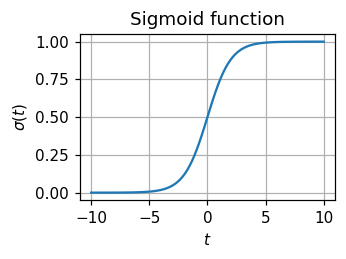

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid (t):
  return 1. / (1 + np.exp(-t))

xAxis = np.linspace(-10, 10, 100)
y = sigmoid(xAxis)

plt.figure(figsize=(3,2), dpi=110)
plt.plot(xAxis, y)
plt.xlabel("$t$")
plt.ylabel("$\\sigma(t)$")
plt.title("Sigmoid function")
plt.grid()
plt.show()

Come si vede, la funzione *sigmoide* è limitata tra 0 e 1, ha un assintoto a zero per $t \to -\infty$ e un assintoto a uno per $t \to + \infty$.
Inoltre per $t=0$, $\sigma(0) = \frac{1}{2}$.

## La regressione logistica

A differenza della regressione lineare, la regressione logistica contiene un termine non lineare, la sigmoide, che rende le soluzioni analitiche poco agevoli, e spesso possibili solo con qualche approssimazione.

Tipicamente, si procede quindi con una ottimizzazione numerica della funzione verosimiglianza. Vediamo un esempio in cui scriviamo esplicitamente la funzione verosimiglianza e la ottimizziamo utilizzando Minuit.

Per prima cosa, costruiamo il nostro *dataset*. Prendiamo un dataset uniforme sul piano $x \perp y$ con $x \in [0,1)$ e $y \in [0, 1)$ e assegnamo a due categorie $0$ e $1$ i punti secondo una certa probabilità.
Per rendere la regressione logistica adeguata al problema, scegliamo una funzione semplice, che ponga i punti vicino all'angolo $(x, y) = (0, 0)$ nella categoria $0$ e i punti nell'angolo $(x, y) = (1, 1)$ nella categoria $1$.

Per confrontare i risultati della regressione logistica con i valori posti nella costruzione del *dataset* (verità Monte Carlo), scriviamo la probabilità che un punto appartenga alla categoria $1$ come:
$$
p(x, y) = \sigma (m_x x + m_y y + q)
$$
e scegliamo ad esempio
$$
\begin{array}{l}
m_x = 3\\
m_y = 3\\
q = -3
\end{array}
$$

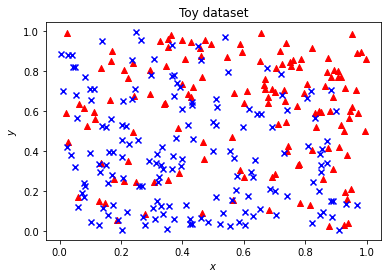

In [ ]:
n_entries = 300
x, y = np.random.uniform (size=(2, n_entries))
proba = sigmoid(3*x + 3*y - 3)
category = np.where(np.random.uniform(0,1, size=x.shape) < proba, 1, 0)
plt.scatter (x[category==1], y[category==1], marker='^', color='red')
plt.scatter (x[category==0], y[category==0], marker='x', color='blue')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Toy dataset")

plt.show()

Scriviamo la funzione `crossentropy` ricordando che:
1. deve calcolare la binary cross-entropy, o negative log-likelihood secondo la formula $$
\boxed{
  -\log\mathcal L = -\sum_{i} \Big[ c_i \log(\mathrm p(\vec x| \vec \theta))
+ (1-c_i) \log\mathrm{(1 - p(\vec x| \vec \theta))}\Big],
}
$$
dove abbiamo indicato la categoria a cui appartiene l'$i$-esimo valore con $c_i$.
2. gli argomenti della funzione devono essere le variabili libere nel processo di minimizzazione, quindi $\vec \theta$.

Nel nostro caso, $\mathrm p(\vec x|\vec \theta) = \sigma(\vec m \cdot \vec x + q)$, quindi i parametri $\vec \theta$ sono $m_x$, $m_y$ e $q$ e la negative log-likelihood si può scrivere come:
$$
\boxed{
  -\log\mathcal L = -\sum_{i} \Big[ c_i \log[\sigma(m_x x_i + m_y y_i + q)]
+ (1-c_i) \log[1 - \sigma(m_x x_i + m_y y_i + q)]\Big]
}
$$

In [ ]:
def crossentropy (mx, my, q):
  yhat = sigmoid(mx*x + my*y + q)
  return - np.sum(category*np.log(yhat)) - np.sum((1-category)*np.log(1-yhat))

### Ottimizzazione numerica con Minuit

Procediamo quindi minimizzando la negative log-likelihood con una libreria di ottimizzazione numerica, ad esempio [*iminuit*](https://iminuit.readthedocs.io/en/stable/).

In [ ]:
!pip install -q iminuit
from iminuit import Minuit

m = Minuit(crossentropy, mx=0, my=0, q=0)
m.errordef = 0.5
m.migrad()

     |████████████████████████████████| 342 kB 5.3 MB/s 


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 172.8                      │              Nfcn = 69               │
│ EDM = 2.7e-05 (Goal: 0.0001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mx   │    2.4    │    0.5    │            │            │         │         │       │
│ 1 │ my   │    2.9    │    0.5    │            │            │         │         │       │
│ 2 │ q    │   -2.8    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────────────────┐
│    │     mx     my      q │
├────┼──────────────────────┤
│ mx │  0.224  0.041 -0.135 │
│ my │  0.041  0.231 -0.138 │
│  q │ -0.135 -0.138  0.156 │
└────┴──────────────────────┘

Confrontando i valori ottenuti da *iminuit* per `mx`, `my` e `q` con la verità Monte Carlo per $m_x$, $m_y$ e $q$, osserviamo che i valori sono compatibili entro gli errori statistici.

## Rappresentazione grafica del risultato dell'ottimizzazione

Possiamo visualizzare il risultato del fit sovrapponendo curve a pari probabilità (di essere segnale) al piano $x \perp y$.

Costruire questi plot richiede un po' di ginnastica, discussa con commenti nel codice.

Concettualmente, dobbiamo costruire una griglia di campionamenti della probabilità sul piano $x, y$ e testare il nostro modello su ciascun punto di questa griglia.
Poi potremo rappresentare la probabilità predetta dal modello per ciascun punto del piano.



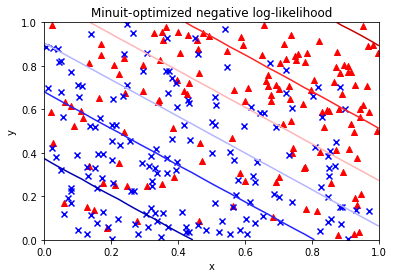

In [ ]:
# Riproduciamo il grafico del dataset, come sopra.
plt.scatter (x[category==1], y[category==1], marker='^', color='red')
plt.scatter (x[category==0], y[category==0], marker='x', color='blue')

# Costruiamo gli assi x e y, definendo estremi e numero di "campionamenti" della probabilità
xAxis = np.linspace(0, 1, 10)
yAxis = np.linspace(0, 1, 100)

# Quindi costruiamo una griglia xy in cui combiniamo tutti i valori di x con tutti i valori di y
XY = np.array([(x_, y_) for x_ in xAxis for y_ in yAxis])

# La prima colonna di XY rappresenta tutti i campionamenti di X
# La seconda tutti i campionamenti di Y
X = XY[:, 0]; Y = XY[:,1]

# Usiamo i campionamenti sulla griglia per calcolare la predizione del nostro modello
yhat = sigmoid(m.values['mx']*X + m.values['my']*Y + m.values['q'])

# Infine, mettiamo su un grafico di tipo `contour` i valori ottenuti per le predizioni.
# IMPORTANTE! Si noti che il terzo argomento di `contour` deve essere un array 2D
#             che riporta i valori della funzione da plottare su una griglia Ny x Nx,
#             quindi dobbiamo convertire il nostro array 1D con le predizioni in un array 2D
#             appropriato: con **reshape e trasposizione**.
plt.contour(xAxis, yAxis, yhat.reshape((len(xAxis), len(yAxis))).T, cmap='seismic')

# E abbelliamo un po' il grafico
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minuit-optimized negative log-likelihood")
plt.show()

## Regressione logistica con `scikit-learn`

Naturalmente, `scikit-learn` mette a disposizione le routine necessarie per applicare la regressione logistica ad un campione, senza scrivere esplicitamente la negative log-likelihood e minimizzarla.
Queste operazioni vengono svolte all'interno della libreria offrendo una interfaccia analoga a quella vista per la regressione lineare.

Di default `scikit-learn`, applica un termine di regolarizzazione, chiamato "penalità" per agevolare l'applicazione della regressione logistica a campioni con dimensionalità grande (decine di variabili, ad esempio). Per confrontare i risultati di scikit-learn con quelli che abbiamo ottenuto con Minuit, dove non abbiamo applicato nessuna penalità, dobbiamo passare l'argomento `penalty="none"` al costruttore di `LogisticRegression`.

Per ottenere la predizione del modello, una volta addestrato, dobbiamo usare il metodo `predict_proba`, che prende come argomento la matrice definita per colonne delle variabili di input, che nel nostro caso costruiremo a partire da una griglia di campionamenti come visto nel caso di Minuit.
Il metodo `predict_proba` ritorna due colonne, una per la probabilità di ciascuna classe (nel nostro caso, 0 e 1). Per confrontare i risultati con quelli discussi in precedenza, dovremo selezionare la probabilità di appartenere alla categoria $1$, ovvero la seconda colonna.

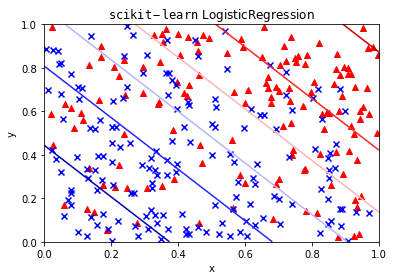

In [ ]:
## Importiamo la classe `LogisticRegression` dal modulo `linear_model`.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(np.c_[x, y], category)

# Ricostruiamo il plot
plt.scatter (x[category==1], y[category==1], marker='^', color='red')
plt.scatter (x[category==0], y[category==0], marker='x', color='blue')
xAxis = np.linspace(0,1,100)
yAxis = np.linspace(0,1,100)
XY = np.array([(x_, y_) for x_ in xAxis for y_ in yAxis])

# Ricalcoliamo qui la probabilità che ciascun punto della griglia appartenga alla classe 1
yhat = lr.predict_proba(XY)[:,1]
plt.contour(xAxis, yAxis, yhat.reshape((len(yAxis), len(xAxis))), cmap='seismic')
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\mathtt{scikit-learn}$ LogisticRegression")

plt.show()

### Confronto dei risultati
Possiamo confrontare i risultati ottenuti con scikit-learn ed Minuit per verificare nuovamente che i due metodi siano equivalenti.

In [ ]:
print (f"mx: {m.values['mx']:> 4.2f} (minuit)   {lr.coef_[0,0]:> 4.2f} (scikit-learn)")
print (f"my: {m.values['my']:> 4.2f} (minuit)   {lr.coef_[0,1]:> 4.2f} (scikit-learn)")
print (f"q:  {m.values['q' ]:> 4.2f} (minuit)   {lr.intercept_[0]:> 4.2f} (scikit-learn)")

mx:  2.43 (minuit)    2.43 (scikit-learn)
my:  2.89 (minuit)    2.89 (scikit-learn)
q:  -2.82 (minuit)   -2.82 (scikit-learn)


# Regressione logistica su variabili trasformate

Così come abbiamo esteso la regressione lineare ad una regressione polinomiale, trasformando le variabili di input con l'operazione non lineare di elevamento a potenza, possiamo estendere la regressione logistica trasformando le variabili in input (a costo di rendere complicata la propagazione degli errori, che spesso vengono però ignorati).

Per costruire un esempio dove la trasformazione delle variabili sia efficace, consideriamo un campione di dati in cui siano presenti due categorie:
 * **segnale**, distribuito con una gaussiana centrata in (x, y) = (0.5, 0.5)
 * **fondo**, distribuito in modo uniforme sul piano $x \perp y$ con $x \in [0,1)$ ed $y \in [0,1)$.


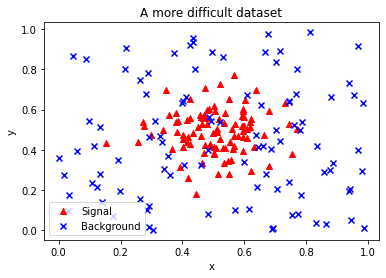

In [ ]:
n_entries = 200
xs, ys = np.random.normal (0.5, 0.1, size=(2, n_entries//2))
xb, yb = np.random.uniform (0, 1, size=(2, n_entries//2))
x = np.concatenate((xs, xb))
y = np.concatenate((ys, yb))
category = np.concatenate((np.ones(n_entries//2), np.zeros(n_entries//2)))
plt.scatter (x[category==1], y[category==1], marker='^', color='red', label='Signal')
plt.scatter (x[category==0], y[category==0], marker='x', color='blue', label="Background")
plt.xlabel("x")
plt.ylabel("y")
plt.title("A more difficult dataset")
plt.legend()
plt.show()

Come è ovvio, una regressione logistica non può essere di grande aiuto in questo caso per separare segnale e fondo.

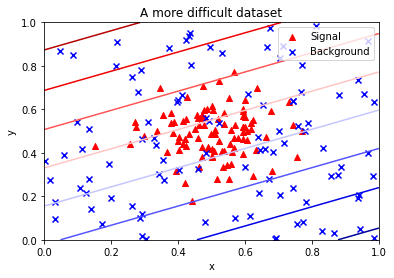

In [ ]:
lr = LogisticRegression(penalty='none')
lr.fit(np.c_[x,y], category)
plt.scatter (x[category==1], y[category==1], marker='^', color='red', label='Signal')
plt.scatter (x[category==0], y[category==0], marker='x', color='blue', label="Background")
plt.xlabel("x")
plt.ylabel("y")
plt.title("A more difficult dataset")
plt.legend()
xAxis = np.linspace(0,1,100)
yAxis = np.linspace(0,1,100)
XY = np.array([(x_, y_) for x_ in xAxis for y_ in yAxis])
yhat = lr.predict_proba(XY)[:,1]
plt.contour(xAxis, yAxis, yhat.reshape((len(xAxis), len(yAxis))).T, cmap='seismic')
plt.show()

Possiamo tuttavia ottenere una classificazione più che buona, se invece di modellizzare la probabilità
$$
\mathrm p (x,y|\vec \theta) = \sigma(m_x x + m_y y + q)
$$
scrivessimo
$$
\mathrm p (x,y|\vec \theta) = \sigma(m_x x + m_y y + p_x x^2 + p_y y^2 + q)
$$

Come nel caso della regressione polinomiale, l'estensione è piuttosto facile da implementare, ed il risultato notevole.

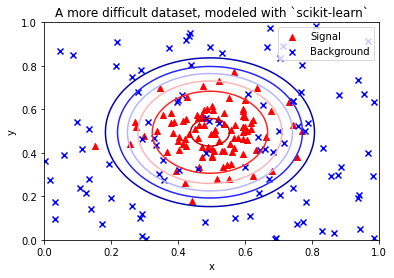

In [ ]:
lr = LogisticRegression(penalty='none')

## Usiamo come variabili di input della regressione logistica x, y, x*2 e y^2.
lr.fit(np.c_[x,y,x**2, y**2], category)

plt.scatter (x[category==1], y[category==1], marker='^', color='red', label='Signal')
plt.scatter (x[category==0], y[category==0], marker='x', color='blue', label="Background")
plt.xlabel("x")
plt.ylabel("y")
plt.title("A more difficult dataset, modeled with `scikit-learn`")
plt.legend()
xAxis = np.linspace(0,1,100)
yAxis = np.linspace(0,1,100)
X, Y = np.meshgrid(xAxis, yAxis)
XY = np.c_[X.flatten(), Y.flatten(), X.flatten()**2, Y.flatten()**2]
yhat = lr.predict_proba(XY)[:,1]
plt.contour(xAxis, yAxis, yhat.reshape((len(yAxis), len(xAxis))), cmap='seismic')
plt.show()

# Classificazione multi-obiettivo

Possiamo facilmente estendere il concetto di classificazione binaria in classificazione multi-obiettivo (*multi-target* o *multi-label*).

La negative log-likelihood diventerà
$$
-\log\mathcal L = \sum_k \sum_{i \in \{i : c_i = k\}_i} \log p_k(\vec x_i|\vec \theta)
$$
dove abbiamo indicato come $p_k (\vec x_i | \vec \theta)$ la probabilità che un elemento appartenga alla $k$-esima classe.

Si dimostra facilmente che questa espressione restituisce la *binary cross-entropy* se si riduce il problema a k = 0 oppure 1, ricordando che $p_0 = 1 - p_1$ per definizione di probabilità.


Anche la funzione *sigmoide* non è più adeguata allo scopo e abbiamo bisogno di un'altra funzione che limiti le probabilità tra 0 e 1 e al contempo imponga che la somma delle probabilità predette sia 1.
La funzione di attivazione utilizzata normalmente in questo caso è la funzione *softmax* definita come
$$
\mathrm {softmax}_k (x_1, x_2, ..., x_d) = \frac{\exp(x_k)}{\sum_{\ell = 1}^d \exp(x_\ell)}
$$

Nel caso speciale della classificazione binaria, avremmo
$$
\mathrm{softmax}_1 (x_1, x_2) = \frac{\exp(x_1)}{\exp(x_1) + \exp(x_2)}
$$
se $x_2$ (che non contiene informazione sulla probabilità perché abbiamo il vincolo sulla normalizzazione che data la probabilità $p_1$ implica il valore di $p_2$) è posto arbitrariamente a zero, allora riotteniamo esattamente la sigmoide.
$$
\mathrm{softmax}_1 (x_1) = \frac{\exp(x_1)}{\exp(x_1) + \exp(0)}
$$

Così come per la classificazione binaria, possiamo scrivere che
$$
\left(
  \begin{array}{l}
    \mathrm p_1 (\vec x|\mathbf \Theta, \vec b)\\
    \mathrm p_2 (\vec x|\mathbf \Theta, \vec b)\\
    \vdots\\
    \mathrm p_d (\vec x|\mathbf \Theta, \vec b)\\
  \end{array}
  \right) = \mathrm{softmax}\left(\mathbf{\Theta} \vec x + \vec q\right)
$$

La classificazione multi-obiettivo è implementata in `scikit-learn` con interfaccia analoga a quella già discussa per la classificazione binaria, che viene considerata ineffetti un caso particolare della classificazione multi-obiettivo.

Vediamo un esempio, generando un dataset semplice, in cui dividiamo il piano $x \perp y$ con $x \in [-1, 1)$ e $y \in [-1, 1)$ in tre parti uguali in base all'angolo polare e cerchiamo di classificare i punti con la regressione logistica multi-obiettivo.

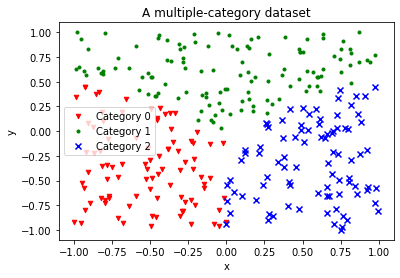

In [ ]:
n = 300
x, y = np.random.uniform(-1,1,size=(2, n))
cat = np.where(np.arctan2(x,y) > -np.pi/3, np.where(np.arctan2(x,y) < np.pi/3, 1, 2), 0)

plt.scatter(x[cat==0], y[cat==0], label="Category 0", color='red', marker='v', s=20)
plt.scatter(x[cat==1], y[cat==1], label="Category 1", color='green', marker='.')
plt.scatter(x[cat==2], y[cat==2], label="Category 2", color='blue', marker='x')
plt.xlabel('x')
plt.ylabel("y")
plt.title("A multiple-category dataset")
plt.legend()

Applicando il metodo `fit` "addestriamo" il nostro modello, e poi lo sovrapponiamo al dataset dopo averlo interrogato con il metodo `predit_proba` di cui questa volta ci interessano tutte e tre le colonne.

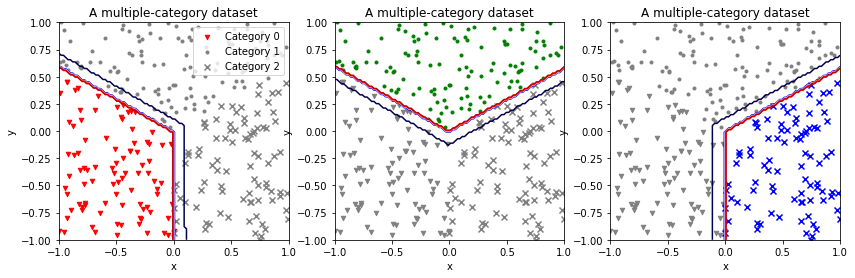

In [ ]:
lr = LogisticRegression(penalty='none')
lr.fit(np.c_[x,y], cat)

xAxis = np.linspace(-1,1,100)
yAxis = np.linspace(-1,1,100)
XY = [(x_, y_) for x_ in xAxis for y_ in yAxis]
yhat = lr.predict_proba(XY)
plt.figure(figsize=(14,4))
for category in 0, 1, 2:
  plt.subplot(1,3,category+1)
  plt.scatter(x[cat==0], y[cat==0], label="Category 0", color='red' if category==0 else 'gray', marker='v', s=20)
  plt.scatter(x[cat==1], y[cat==1], label="Category 1", color='green' if category==1 else 'gray', marker='.')
  plt.scatter(x[cat==2], y[cat==2], label="Category 2", color='blue' if category==2 else 'gray', marker='x')
  plt.contour(xAxis, yAxis, yhat[:,category].reshape(len(xAxis), len(yAxis)).T, cmap='seismic')
  plt.xlabel('x')
  plt.ylabel("y")
  plt.title("A multiple-category dataset")
  if category==0:
    plt.legend(loc='upper right')

Infine, verifichiamo che i parametri contenuti nella classe `LogisticRegression` abbiano proprio la forma che ci aspettiamo per $\mathbf \Theta$ e $\vec b$.

In [ ]:
print ("Matrice Theta:\n", lr.coef_)
print ("\nVettore b:\n", lr.intercept_)

Matrice Theta:
 [[-3.55083828 -2.26975863]
 [-0.08240927  4.50836326]
 [ 3.63324755 -2.23860463]]

Vettore b:
 [-0.00663007  0.07663621 -0.07000614]


### Esercizio (risolto)
Provate a sostituire il calcolo esplicito della predizione della regressione logistica all'utilizzo del metodo `predict_proba`.

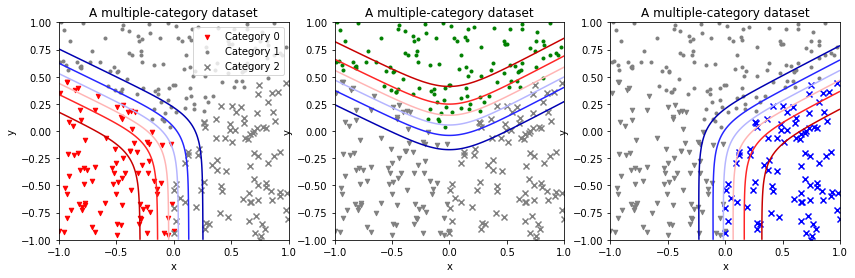

In [ ]:
xAxis = np.linspace(-1,1,100)
yAxis = np.linspace(-1,1,100)
XY = [(x_, y_) for x_ in xAxis for y_ in yAxis]

## Sostituisco
# yhat = lr.predict_proba(XY)
## con:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)
yhat = softmax(XY@lr.coef_.T + lr.intercept_)

plt.figure(figsize=(14,4))
for category in 0, 1, 2:
  plt.subplot(1,3,category+1)
  plt.scatter(x[cat==0], y[cat==0], label="Category 0", color='red' if category==0 else 'gray', marker='v', s=20)
  plt.scatter(x[cat==1], y[cat==1], label="Category 1", color='green' if category==1 else 'gray', marker='.')
  plt.scatter(x[cat==2], y[cat==2], label="Category 2", color='blue' if category==2 else 'gray', marker='x')
  plt.contour(xAxis, yAxis, yhat[:,category].reshape(len(xAxis), len(yAxis)).T, cmap='seismic')
  plt.xlabel('x')
  plt.ylabel("y")
  plt.title("A multiple-category dataset")
  if category==0:
    plt.legend(loc='upper right')

## Conclusioni

In questo *notebook* abbiamo introdotto il concetto di classificazione approfondendo in particolare la classificazione binaria.
Abbiamo analizzato nel dettaglio un semplice algoritmo di classificazione binaria, chiamato Regressione Logistica, che suddivide il campione in classi attraverso un'ottimizzazione numerica.

Abbiamo poi esteso l'algoritmo aggiungendo *feature* derivate dalle variabili originali, ad esempio elevando queste ultime al quadrato, e abbiamo visto come l'algoritmo diventa adeguato per risolvere problemi chiaramente non lineari.

Infine abbiamo esteso la discussione alla classificazione multi-obiettivo in cui cerchiamo di classificare gli elementi in più di due categorie.